  # ACTIVITY 1: Sales Data Analysis and Visualization

In [1]:
%pip install pandas
%pip install matplotlib

## Importing Pandas and Matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Load the Dataset

In [19]:
df = pd.read_csv("SalesDataCSV.csv")

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Order ID,Date,Product,Category,Quantity,Price,Total
0,1001,2023-01-15,Laptop,Electronics,2.0,800.0,1600.0
1,1002,2023-01-16,Sofa,Furniture,1.0,450.0,450.0
2,1003,2023-01-17,T-Shirt,Clothing,5.0,25.0,125.0
3,1004,2023-01-18,Smartphone,Electronics,1.0,NaN,700.0
4,1005,2023-01-19,Dining Table,Furniture,NaN,300.0,NaN


## Task 2: Explore and Clean the Dataset

In [36]:
print("Missing values before filling:")
print(df.isnull().sum())

df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())

df.columns = df.columns.str.strip()

df['Product'] = df['Product'].str.strip()

print("\nFirst 5 rows after cleaning:")
print(df.head())

Missing values before filling:
Order ID    0
Date        0
Product     0
Category    0
Quantity    0
Price       0
Total       0
Month       0
dtype: int64

Missing values after filling:
Order ID    0
Date        0
Product     0
Category    0
Quantity    0
Price       0
Total       0
Month       0
dtype: int64

First 5 rows after cleaning:
   Order ID       Date       Product     Category  Quantity     Price  \
0      1001 2023-01-15        Laptop  Electronics  2.000000  800.0000   
1      1002 2023-01-16          Sofa    Furniture  1.000000  450.0000   
2      1003 2023-01-17       T-Shirt     Clothing  5.000000   25.0000   
3      1004 2023-01-18    Smartphone  Electronics  1.000000  259.6875   
4      1005 2023-01-19  Dining Table    Furniture  2.571429  300.0000   

         Total    Month  
0  1600.000000  2023-01  
1   450.000000  2023-01  
2   125.000000  2023-01  
3   700.000000  2023-01  
4   437.368421  2023-01  


In [37]:
# Drop rows with missing Date values
df.dropna(subset=['Date'], inplace=True)

# Fill missing Product values with "Unknown"
df['Product'].fillna('Unknown', inplace=True)

print("Missing values after further cleaning:")
print(df.isnull().sum())

print("\nFirst 5 rows after further cleaning:")
print(df.head())

Missing values after further cleaning:
Order ID    0
Date        0
Product     0
Category    0
Quantity    0
Price       0
Total       0
Month       0
dtype: int64

First 5 rows after further cleaning:
   Order ID       Date       Product     Category  Quantity     Price  \
0      1001 2023-01-15        Laptop  Electronics  2.000000  800.0000   
1      1002 2023-01-16          Sofa    Furniture  1.000000  450.0000   
2      1003 2023-01-17       T-Shirt     Clothing  5.000000   25.0000   
3      1004 2023-01-18    Smartphone  Electronics  1.000000  259.6875   
4      1005 2023-01-19  Dining Table    Furniture  2.571429  300.0000   

         Total    Month  
0  1600.000000  2023-01  
1   450.000000  2023-01  
2   125.000000  2023-01  
3   700.000000  2023-01  
4   437.368421  2023-01  


C:\Users\Gingo\AppData\Local\Temp\ipykernel_9892\2599881680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna('Unknown', inplace=True)


In [24]:
df['Product'] = df['Product'].fillna('Unknown')

In [38]:
print(df.isnull().sum())

Order ID    0
Date        0
Product     0
Category    0
Quantity    0
Price       0
Total       0
Month       0
dtype: int64


## Task 3: Data Analysis and Manipulation

In [39]:
# Calculate total sales per product
total_sales_per_product = df.groupby('Product')['Total'].sum().reset_index()

# Sort by descending order
top_5_products = total_sales_per_product.sort_values(by='Total', ascending=False).head(5)

print("Total Sales Per Product:")
print(total_sales_per_product)

print("\nTop 5 Best-Selling Products:")
print(top_5_products)

Total Sales Per Product:
            Product        Total
0               Bed   437.368421
1      Dining Table   437.368421
2             Dress   120.000000
3        Headphones   200.000000
4            Jacket   150.000000
5            Laptop  1600.000000
6        Laptop Bag   437.368421
7           Monitor   437.368421
8             Shoes   437.368421
9        Smartphone   700.000000
10             Sofa   450.000000
11          T-Shirt   125.000000
12  Washing Machine   437.368421

Top 5 Best-Selling Products:
         Product        Total
5         Laptop  1600.000000
9     Smartphone   700.000000
10          Sofa   450.000000
0            Bed   437.368421
1   Dining Table   437.368421


## Task 4: Data Visualization

### Bar Chart (Total Sales per Product)

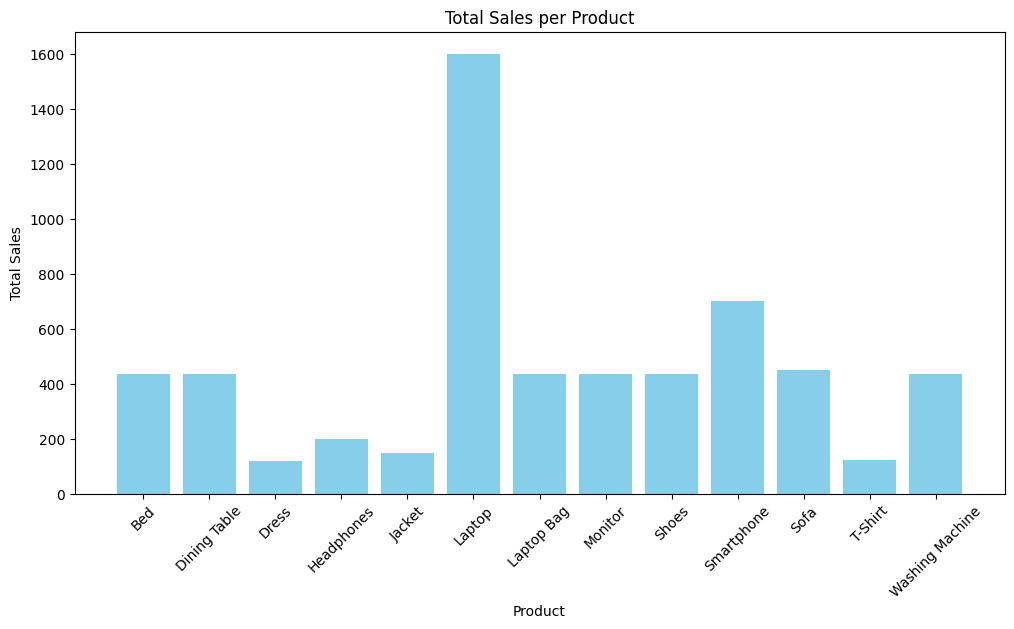

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(total_sales_per_product['Product'], total_sales_per_product['Total'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales per Product")
plt.xticks(rotation=45)
plt.show()

### Line Chart (Monthly Sales Trend)

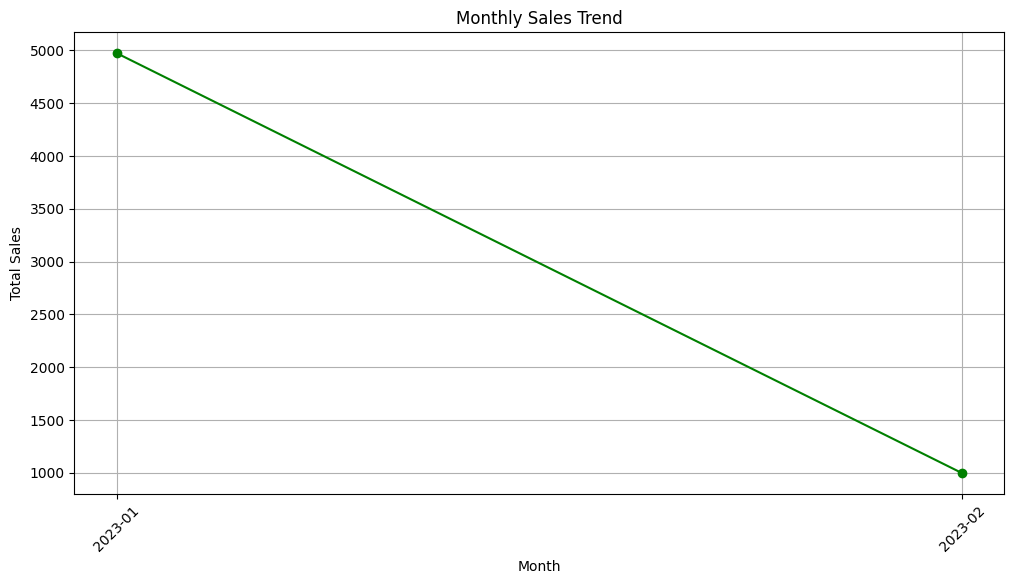

In [35]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and calculate total sales per month
df['Month'] = df['Date'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total'], marker='o', linestyle='-', color='green')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Task 5: Generate a Report

### Sales Data Analysis Report

#### Introduction
This report summarizes the analysis of the sales dataset, including data cleaning, exploration, and key insights from the data. The dataset contains details of sales transactions, including order ID, date, product, category, quantity, price, and total sales.

#### Data Cleaning and Exploration
Missing values were checked in the dataset and missing values in numeric columns were filled with the mean. Extra spaces in column names and product names were stripped. Rows with missing date values were dropped, and missing product names were filled with "Unknown." After cleaning, all missing values were resolved, ensuring the data is ready for analysis.

After cleaning, all missing values were resolved, ensuring accurate data for analysis.

#### Data Analysis and Manipulation
The total sales for each product were calculated by summing the sales in the 'Total' column for each product. The top 5 products with the highest total sales were then identified by sorting the results in descending order. These insights provide a clear overview of the best-performing products.

#### Data Visualization
A bar chart was created to display the total sales for each product, with appropriate titles, labels, and legends. Additionally, a line chart was generated to illustrate the monthly sales trend, showing fluctuations in sales over time. Both charts include titles, axis labels, and legends to ensure clarity and understanding of the data.

#### Conclusion
The analysis provides valuable insights into the sales performance, highlighting the best-selling products and trends over time. This information can be used to make informed decisions for improving sales strategies and inventory management.